# Data Loader

In [1]:
import numpy as np
from moabb.datasets import BNCI2014001
import pandas as pd
import mne
from moabb.paradigms import  MotorImagery

%matplotlib inline

In [12]:
paradigm = MotorImagery(n_classes=4)
dataset = BNCI2014001()
subjects = [1,2,3,4,5,6,7,8,9]


X, y, metadata = paradigm.get_data(dataset=dataset, subjects=subjects)

Choosing from all possible events


In [13]:
print(subjects)

[1, 2, 3, 4, 5, 6, 7, 8, 9]


In [14]:
y

array(['tongue', 'feet', 'right_hand', ..., 'feet', 'left_hand', 'feet'],
      dtype='<U10')

In [15]:
!dir

 El volumen de la unidad C no tiene etiqueta.
 El número de serie del volumen es: 7615-C449

 Directorio de C:\Users\Pablo\brain-computer-interfacing\project

25/04/2020  12:02    <DIR>          .
25/04/2020  12:02    <DIR>          ..
18/04/2020  13:31    <DIR>          .ipynb_checkpoints
04/04/2020  10:28                 0 .keep
25/04/2020  12:02         1.210.888 01_Managing_data.ipynb
18/04/2020  12:26           143.605 02-Preprocessing.ipynb
18/04/2020  12:19    <DIR>          data
18/04/2020  12:19             2.881 labels.csv
18/04/2020  13:33            97.427 ML.ipynb
18/04/2020  12:19             1.462 README.md
               6 archivos      1.456.263 bytes
               4 dirs   6.217.261.056 bytes libres


In [16]:
import csv

Y = [int(0) if i == 'right_hand' else int(1) for i in y]
with open('./data/labels_004_1.csv', 'w', newline='') as myfile:
     wr = csv.writer(myfile, quoting=csv.QUOTE_ALL)
     wr.writerow(Y)

In [17]:
dataset.subject_list

[1, 2, 3, 4, 5, 6, 7, 8, 9]

In [18]:
Y = y.tolist()
print('Feet: ', Y.count('feet'))
print('Right-hand: ', Y.count('right_hand'))

Feet:  1296
Right-hand:  1296


In [19]:
metadata

,subject,session,run
0,1,session_T,run_0
1,1,session_T,run_0
2,1,session_T,run_0
3,1,session_T,run_0
4,1,session_T,run_0
...,...,...,...
5179,9,session_E,run_5
5180,9,session_E,run_5
5181,9,session_E,run_5
5182,9,session_E,run_5


In [23]:
new_X.shape

NameError: name 'new_X' is not defined

In [25]:
dataset = BNCI2014001()
paradigm = MotorImagery(n_classes=4)

def get_raw(dataset, paradigm, n_channels, sfreq):
    '''
    Takes a dataset from moabb datasets and creates 3 dictionaries with subject number as keys and X matrix, y labels and metadata
    as dictionary values respectively.
    X: Original 3D data matrix (num_cases, n_channels, lectures) is reshaped to 2D matrix (len(num_cases)*len(lectures),len(n_channels))
    y: This array corresponds with the class for each case. It has num_cases length.
    metadata: Describes each subject
    '''
    
    subjects_all = dataset.subject_list
    channels = [str(a+1) for a in range(n_channels)]
    

    X_all_subjects = {}
    y_all_subjects = {}
    metadata_all_subjects = {}
    
    for subject in subjects_all:
        
        X, y, metadata = paradigm.get_data(dataset=dataset, subjects=[subject])
        X = np.delete(X, -1,axis = 2)
        X_2d = X.reshape(n_channels,(X.shape[0]*X.shape[2]))
        data_mne = X_2d
        data_mne = data_mne / 1000000      
                        
        info_mne = mne.create_info(
            ch_names=channels,
            ch_types='eeg',
            sfreq=sfreq)
        
        raw = mne.io.RawArray(data_mne, info_mne)
        #ten_twenty_montage = mne.channels.make_standard_montage('standard_1020')
        #raw_1020 = raw.copy().set_montage(ten_twenty_montage)

        X_all_subjects.update({str(subject):raw})
        y_all_subjects.update({str(subject):y})
        metadata_all_subjects.update({str(subject):metadata})
        
    return X_all_subjects, y_all_subjects, metadata_all_subjects
        
        
X_all_subjects, y_all_subjects, metadata_all_subjects = get_raw(dataset, paradigm, 22, 250)

print(X_all_subjects)
    
    

Choosing from all possible events


Creating RawArray with float64 data, n_channels=22, n_times=576000
    Range : 0 ... 575999 =      0.000 ...  2303.996 secs
Ready.
Creating RawArray with float64 data, n_channels=22, n_times=576000
    Range : 0 ... 575999 =      0.000 ...  2303.996 secs
Ready.
Creating RawArray with float64 data, n_channels=22, n_times=576000
    Range : 0 ... 575999 =      0.000 ...  2303.996 secs
Ready.
Creating RawArray with float64 data, n_channels=22, n_times=576000
    Range : 0 ... 575999 =      0.000 ...  2303.996 secs
Ready.
Creating RawArray with float64 data, n_channels=22, n_times=576000
    Range : 0 ... 575999 =      0.000 ...  2303.996 secs
Ready.
Creating RawArray with float64 data, n_channels=22, n_times=576000
    Range : 0 ... 575999 =      0.000 ...  2303.996 secs
Ready.
Creating RawArray with float64 data, n_channels=22, n_times=576000
    Range : 0 ... 575999 =      0.000 ...  2303.996 secs
Ready.
Creating RawArray with float64 data, n_channels=22, n_times=576000
    Range : 0 ..

In [26]:
X_all_subjects

{'1': <RawArray  |  None, n_channels x n_times : 22 x 576000 (2304.0 sec), ~96.7 MB, data loaded>,
 '2': <RawArray  |  None, n_channels x n_times : 22 x 576000 (2304.0 sec), ~96.7 MB, data loaded>,
 '3': <RawArray  |  None, n_channels x n_times : 22 x 576000 (2304.0 sec), ~96.7 MB, data loaded>,
 '4': <RawArray  |  None, n_channels x n_times : 22 x 576000 (2304.0 sec), ~96.7 MB, data loaded>,
 '5': <RawArray  |  None, n_channels x n_times : 22 x 576000 (2304.0 sec), ~96.7 MB, data loaded>,
 '6': <RawArray  |  None, n_channels x n_times : 22 x 576000 (2304.0 sec), ~96.7 MB, data loaded>,
 '7': <RawArray  |  None, n_channels x n_times : 22 x 576000 (2304.0 sec), ~96.7 MB, data loaded>,
 '8': <RawArray  |  None, n_channels x n_times : 22 x 576000 (2304.0 sec), ~96.7 MB, data loaded>,
 '9': <RawArray  |  None, n_channels x n_times : 22 x 576000 (2304.0 sec), ~96.7 MB, data loaded>}

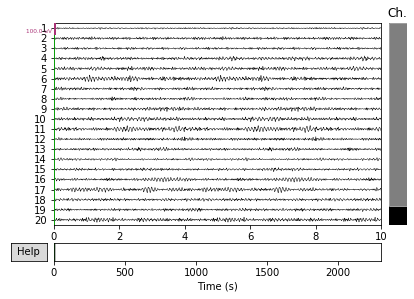

In [27]:
# Way to acces an specific subject
subject_i = X_all_subjects['3']
plot_fig = subject_i.plot(scalings = 0.5e-4)

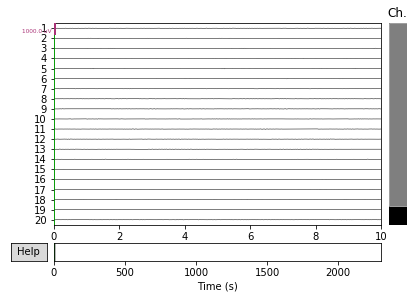

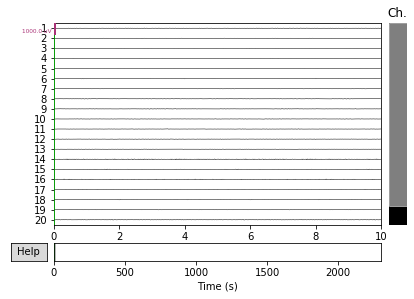

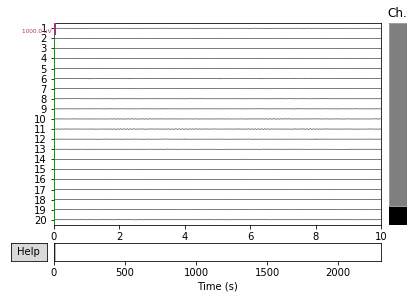

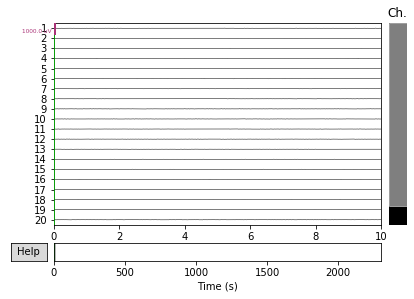

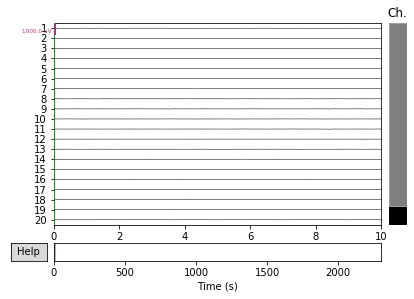

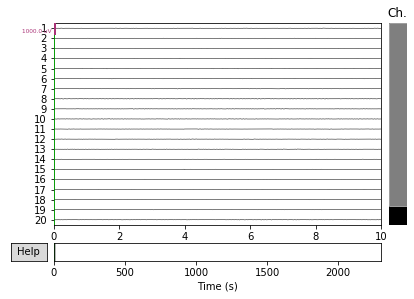

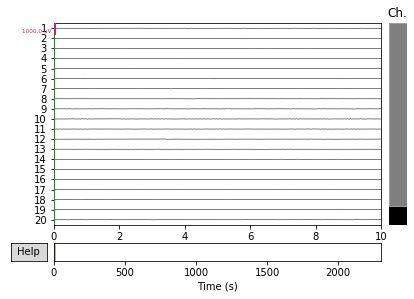

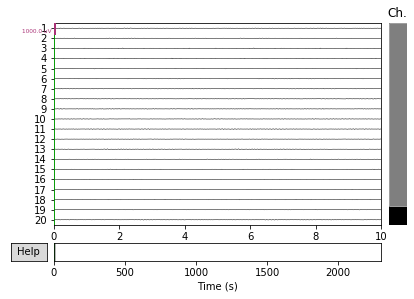

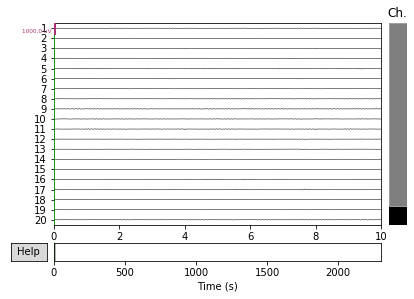

In [28]:
# Way to iterate among the dictionary with all subjects

for k,v  in X_all_subjects.items():
    plot_fig = v.plot(scalings = 0.5e-3)

In [30]:
#Para pasar a .fif

path = '../data/vendor/bnci-001-2014'
for k,v  in X_all_subjects.items():
    v.save(f'{path}/bnci-001-2014-{k}.fif', overwrite=True)

Writing C:\Users\Pablo\brain-computer-interfacing\data\vendor\bnci-001-2014\bnci-001-2014-1.fif


<ipython-input-30-a0e0f192b5fa>:5: RuntimeWarning: This filename (C:\Users\Pablo\brain-computer-interfacing\data\vendor\bnci-001-2014\bnci-001-2014-1.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz or _meg.fif
  v.save(f'{path}/bnci-001-2014-{k}.fif', overwrite=True)


Closing C:\Users\Pablo\brain-computer-interfacing\data\vendor\bnci-001-2014\bnci-001-2014-1.fif [done]
Writing C:\Users\Pablo\brain-computer-interfacing\data\vendor\bnci-001-2014\bnci-001-2014-2.fif


<ipython-input-30-a0e0f192b5fa>:5: RuntimeWarning: This filename (C:\Users\Pablo\brain-computer-interfacing\data\vendor\bnci-001-2014\bnci-001-2014-2.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz or _meg.fif
  v.save(f'{path}/bnci-001-2014-{k}.fif', overwrite=True)


Closing C:\Users\Pablo\brain-computer-interfacing\data\vendor\bnci-001-2014\bnci-001-2014-2.fif [done]
Writing C:\Users\Pablo\brain-computer-interfacing\data\vendor\bnci-001-2014\bnci-001-2014-3.fif


<ipython-input-30-a0e0f192b5fa>:5: RuntimeWarning: This filename (C:\Users\Pablo\brain-computer-interfacing\data\vendor\bnci-001-2014\bnci-001-2014-3.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz or _meg.fif
  v.save(f'{path}/bnci-001-2014-{k}.fif', overwrite=True)


Closing C:\Users\Pablo\brain-computer-interfacing\data\vendor\bnci-001-2014\bnci-001-2014-3.fif [done]
Writing C:\Users\Pablo\brain-computer-interfacing\data\vendor\bnci-001-2014\bnci-001-2014-4.fif


<ipython-input-30-a0e0f192b5fa>:5: RuntimeWarning: This filename (C:\Users\Pablo\brain-computer-interfacing\data\vendor\bnci-001-2014\bnci-001-2014-4.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz or _meg.fif
  v.save(f'{path}/bnci-001-2014-{k}.fif', overwrite=True)


Closing C:\Users\Pablo\brain-computer-interfacing\data\vendor\bnci-001-2014\bnci-001-2014-4.fif [done]
Writing C:\Users\Pablo\brain-computer-interfacing\data\vendor\bnci-001-2014\bnci-001-2014-5.fif


<ipython-input-30-a0e0f192b5fa>:5: RuntimeWarning: This filename (C:\Users\Pablo\brain-computer-interfacing\data\vendor\bnci-001-2014\bnci-001-2014-5.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz or _meg.fif
  v.save(f'{path}/bnci-001-2014-{k}.fif', overwrite=True)


Closing C:\Users\Pablo\brain-computer-interfacing\data\vendor\bnci-001-2014\bnci-001-2014-5.fif [done]
Writing C:\Users\Pablo\brain-computer-interfacing\data\vendor\bnci-001-2014\bnci-001-2014-6.fif


<ipython-input-30-a0e0f192b5fa>:5: RuntimeWarning: This filename (C:\Users\Pablo\brain-computer-interfacing\data\vendor\bnci-001-2014\bnci-001-2014-6.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz or _meg.fif
  v.save(f'{path}/bnci-001-2014-{k}.fif', overwrite=True)


Closing C:\Users\Pablo\brain-computer-interfacing\data\vendor\bnci-001-2014\bnci-001-2014-6.fif [done]
Writing C:\Users\Pablo\brain-computer-interfacing\data\vendor\bnci-001-2014\bnci-001-2014-7.fif


<ipython-input-30-a0e0f192b5fa>:5: RuntimeWarning: This filename (C:\Users\Pablo\brain-computer-interfacing\data\vendor\bnci-001-2014\bnci-001-2014-7.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz or _meg.fif
  v.save(f'{path}/bnci-001-2014-{k}.fif', overwrite=True)


Closing C:\Users\Pablo\brain-computer-interfacing\data\vendor\bnci-001-2014\bnci-001-2014-7.fif [done]
Writing C:\Users\Pablo\brain-computer-interfacing\data\vendor\bnci-001-2014\bnci-001-2014-8.fif


<ipython-input-30-a0e0f192b5fa>:5: RuntimeWarning: This filename (C:\Users\Pablo\brain-computer-interfacing\data\vendor\bnci-001-2014\bnci-001-2014-8.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz or _meg.fif
  v.save(f'{path}/bnci-001-2014-{k}.fif', overwrite=True)


Closing C:\Users\Pablo\brain-computer-interfacing\data\vendor\bnci-001-2014\bnci-001-2014-8.fif [done]
Writing C:\Users\Pablo\brain-computer-interfacing\data\vendor\bnci-001-2014\bnci-001-2014-9.fif


<ipython-input-30-a0e0f192b5fa>:5: RuntimeWarning: This filename (C:\Users\Pablo\brain-computer-interfacing\data\vendor\bnci-001-2014\bnci-001-2014-9.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz or _meg.fif
  v.save(f'{path}/bnci-001-2014-{k}.fif', overwrite=True)


Closing C:\Users\Pablo\brain-computer-interfacing\data\vendor\bnci-001-2014\bnci-001-2014-9.fif [done]


Effective window size : 8.192 (s)


<ipython-input-31-ddd49aa9f7e1>:2: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  fig = subject.plot_psd(fmin = 0, fmax = 300, average=False, tmin = 0, tmax = 250)


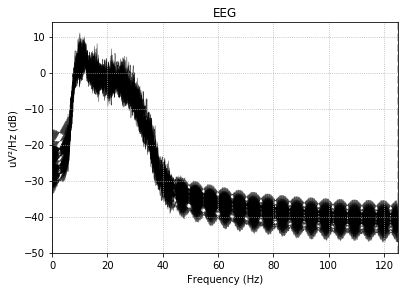

Effective window size : 8.192 (s)


<ipython-input-31-ddd49aa9f7e1>:2: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  fig = subject.plot_psd(fmin = 0, fmax = 300, average=False, tmin = 0, tmax = 250)


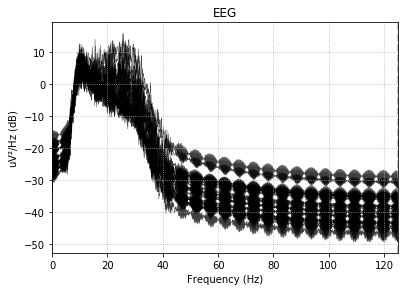

Effective window size : 8.192 (s)


<ipython-input-31-ddd49aa9f7e1>:2: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  fig = subject.plot_psd(fmin = 0, fmax = 300, average=False, tmin = 0, tmax = 250)


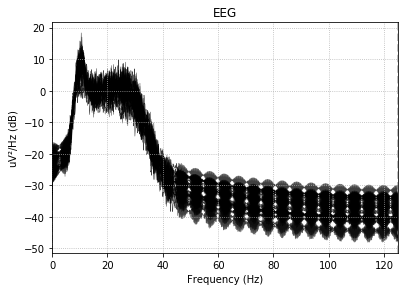

Effective window size : 8.192 (s)


<ipython-input-31-ddd49aa9f7e1>:2: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  fig = subject.plot_psd(fmin = 0, fmax = 300, average=False, tmin = 0, tmax = 250)


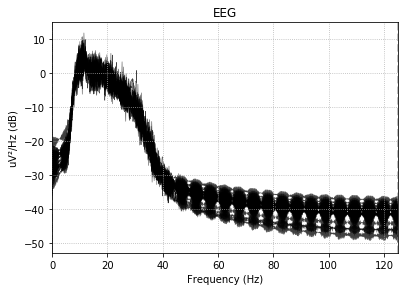

Effective window size : 8.192 (s)


<ipython-input-31-ddd49aa9f7e1>:2: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  fig = subject.plot_psd(fmin = 0, fmax = 300, average=False, tmin = 0, tmax = 250)


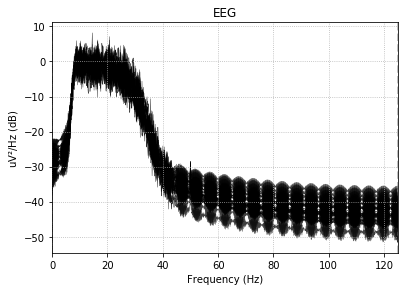

Effective window size : 8.192 (s)


<ipython-input-31-ddd49aa9f7e1>:2: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  fig = subject.plot_psd(fmin = 0, fmax = 300, average=False, tmin = 0, tmax = 250)


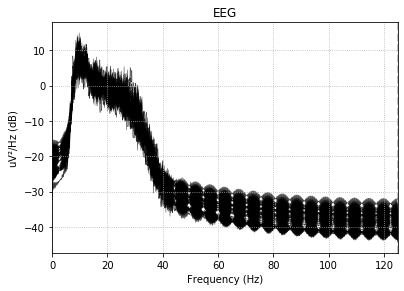

Effective window size : 8.192 (s)


<ipython-input-31-ddd49aa9f7e1>:2: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  fig = subject.plot_psd(fmin = 0, fmax = 300, average=False, tmin = 0, tmax = 250)


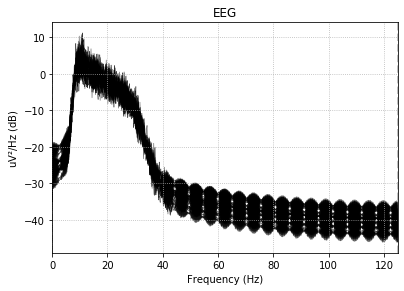

Effective window size : 8.192 (s)


<ipython-input-31-ddd49aa9f7e1>:2: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  fig = subject.plot_psd(fmin = 0, fmax = 300, average=False, tmin = 0, tmax = 250)


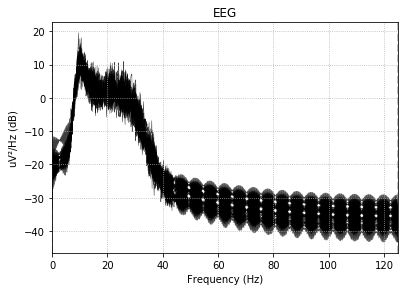

Effective window size : 8.192 (s)


<ipython-input-31-ddd49aa9f7e1>:2: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  fig = subject.plot_psd(fmin = 0, fmax = 300, average=False, tmin = 0, tmax = 250)


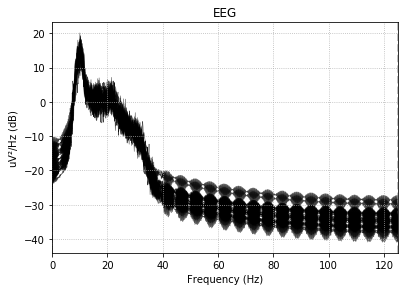

In [31]:
for number,subject in X_all_subjects.items():
    fig = subject.plot_psd(fmin = 0, fmax = 300, average=False, tmin = 0, tmax = 250)